In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt 
from torchvision import datasets, transforms

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
BATCH_SIZE = 128
data_transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train = True, transform = data_transform, download = True)
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)

#### ARCHITECTURE

In [25]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=32, hidden_dim=256):
        super().__init__()

        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim),
            nn.ReLU(),
        )

        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        z = self.encoder(x)
        x_reconstruct = self.decoder(z)
        return x_reconstruct #still a vector for now, not an image

#### MODEL args

In [28]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
epochs = 5

In [29]:
model.train()

for epoch in range(epochs):
    total_loss =0
    for x, _ in train_loader: #inputs(images), labels(digits)
        x=x.view(-1, 784).to(device) #handling last batch and convert the eg:
        # [128,1,28,28] to [128,784]

        optimizer.zero_grad()
        x_reconstruct = model(x)
        loss = criterion(x_reconstruct, x)
        loss.backward()
        optimizer.step()

        total_loss = total_loss+loss.item() # loss item to get current iteration loss

    avg_loss = total_loss/len(train_loader)
    print(f'epoch [{epoch+1}/{epochs}], loss: {avg_loss: .6f}')

epoch [1/5], loss:  0.044036
epoch [2/5], loss:  0.018625
epoch [3/5], loss:  0.015294
epoch [4/5], loss:  0.013889
epoch [5/5], loss:  0.012954


In [41]:
model.eval()

with torch.no_grad():
    x,_ = next(iter(train_loader))
    x=x.view(-1,784).to(device)
    x_reconstruct = model(x)
    

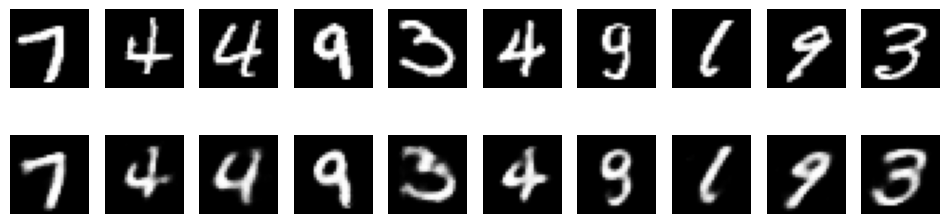

In [44]:
n=10 #images to display
plt.figure(figsize = (12,3))

for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x[i].view(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(2,n,i+1+n)
    plt.imshow(x_reconstruct[i].view(28,28), cmap='gray')
    plt.axis('off')
plt.show()
